In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl 

In [45]:
linies = []

linia1 = pd.read_excel("Data/rawData/TMB/linia1.xlsx")
linies.append(linia1)
linia2 = pd.read_excel("Data/rawData/TMB/linia2.xlsx")
linies.append(linia2)
linia3 = pd.read_excel("Data/rawData/TMB/linia3.xlsx")
linies.append(linia3)
linia4 = pd.read_excel("Data/rawData/TMB/linia4.xlsx")
linies.append(linia4)
linia5 = pd.read_excel("Data/rawData/TMB/linia5.xlsx")
linies.append(linia5)
linia910N = pd.read_excel("Data/rawData/TMB/linia910nord.xlsx")
linies.append(linia910N)
linia910S = pd.read_excel("Data/rawData/TMB/linia910sud.xlsx")
linies.append(linia910S)
linia11 = pd.read_excel("Data/rawData/TMB/linia11.xlsx")
linies.append(linia11)



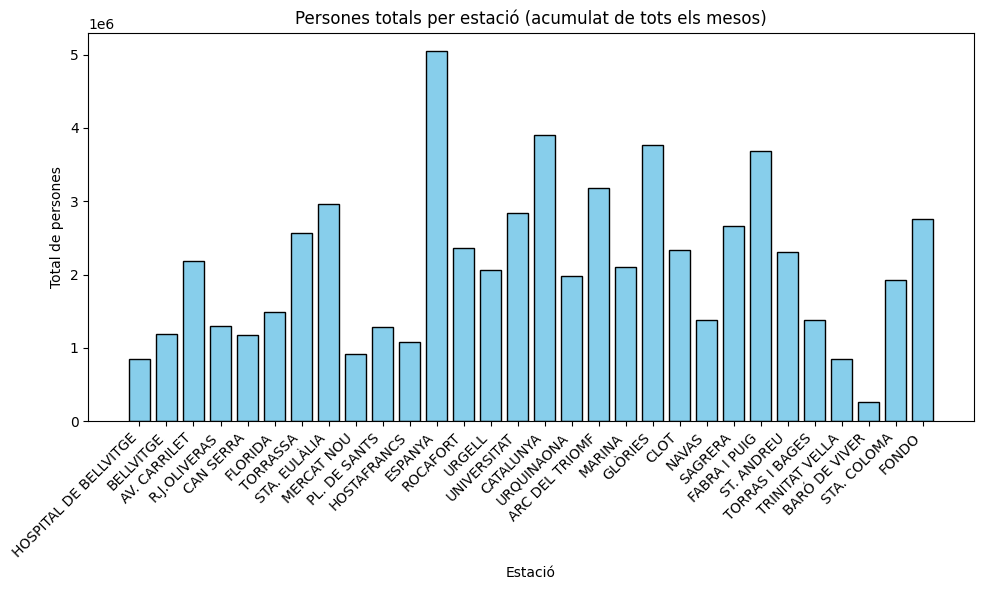

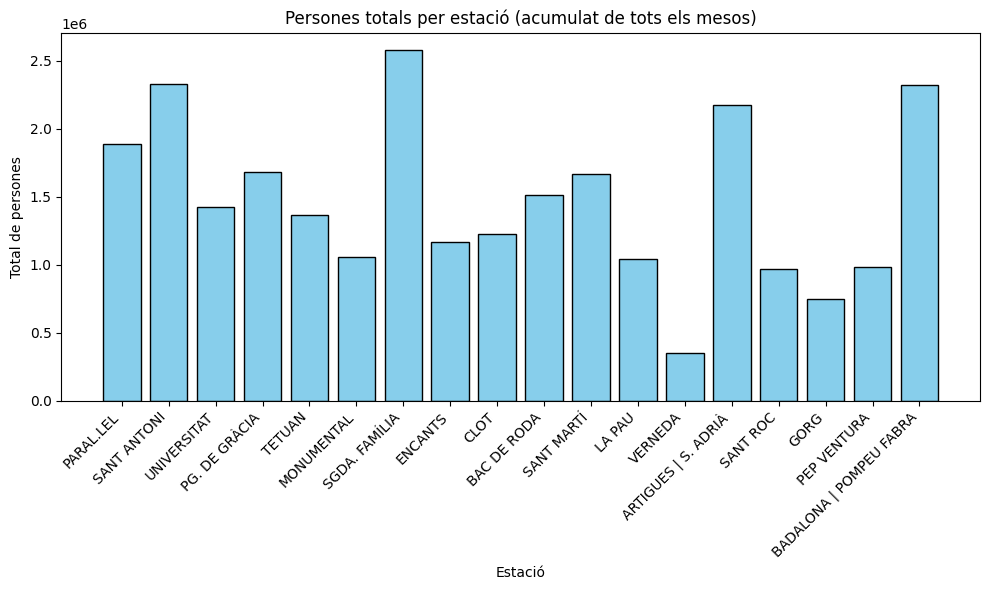

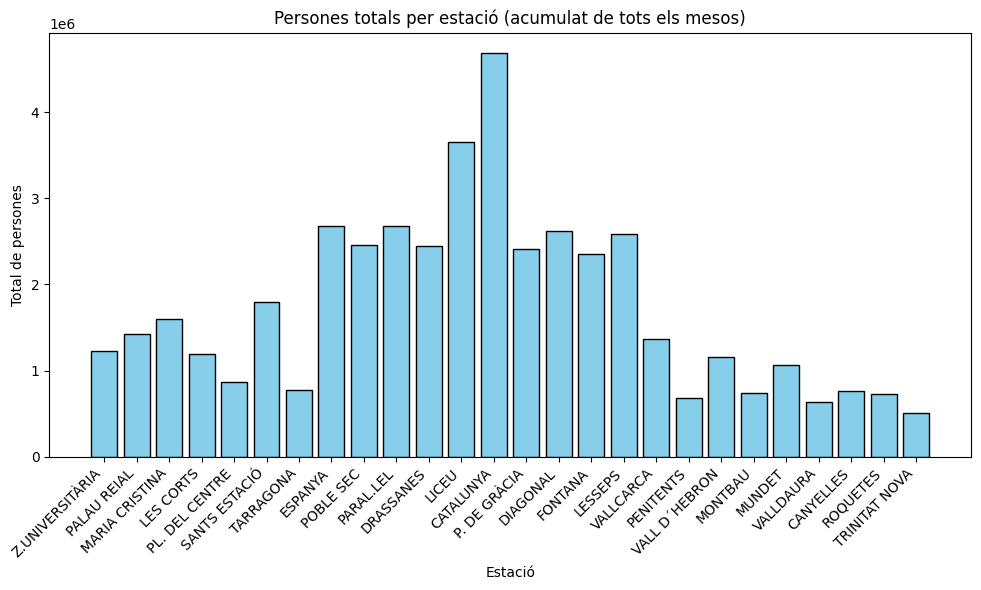

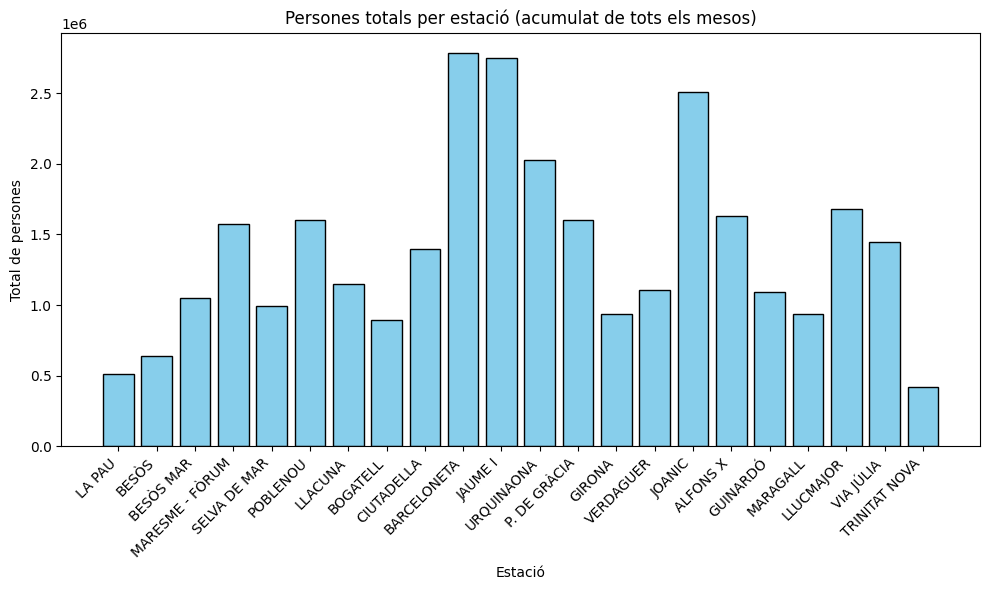

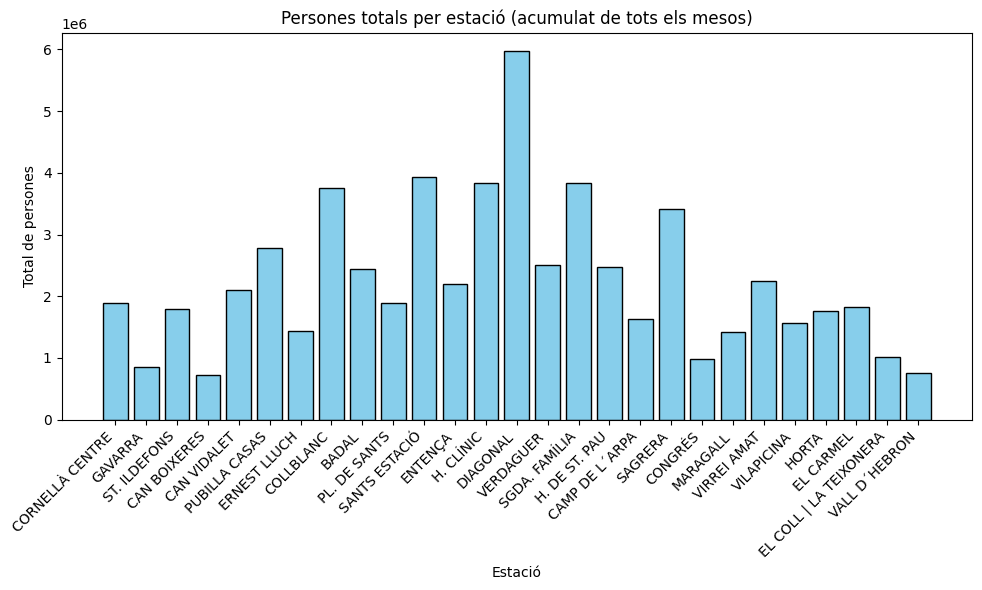

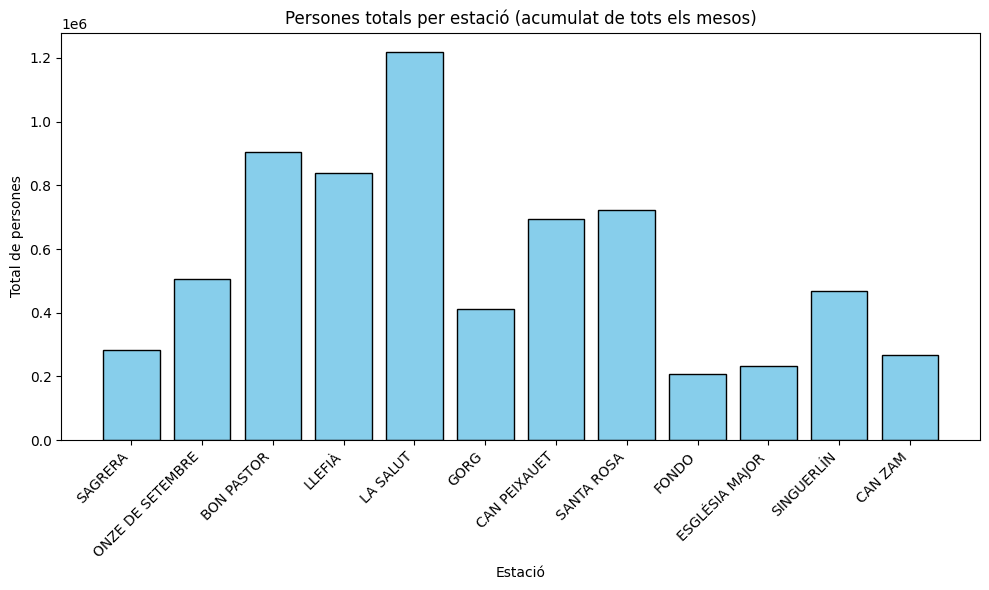

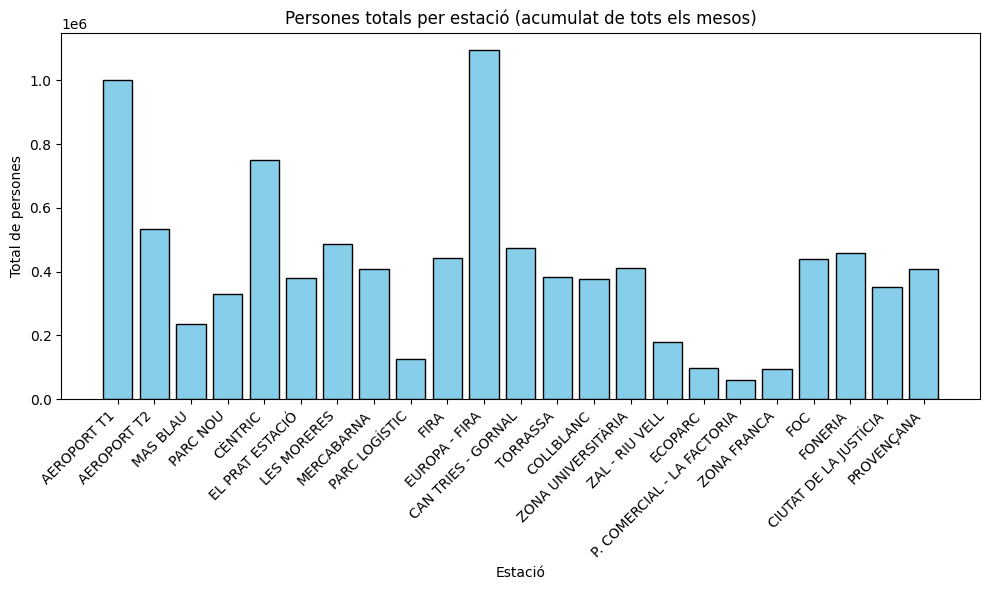

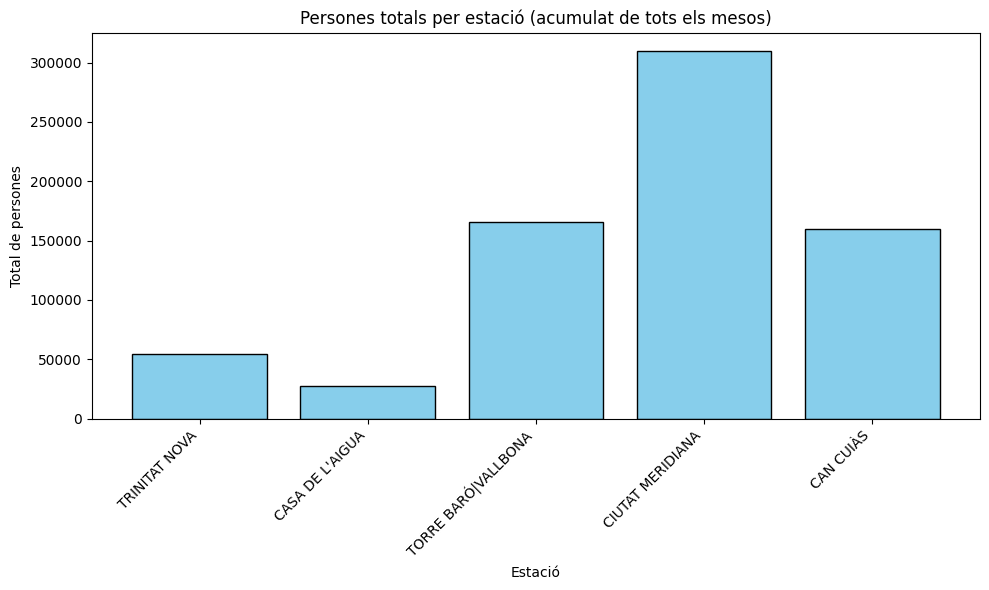

In [46]:
for linia in linies:
    plt.figure(figsize=(10,6))
    plt.bar(linia["Parada"].iloc[:-1], linia["ACUMULAT"].iloc[:-1], color="skyblue", edgecolor="black")
    plt.title("Persones totals per estació (acumulat de tots els mesos)")
    plt.xlabel("Estació")
    plt.ylabel("Total de persones")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

{'BELLVITGE': 1192851.0, 'AV. CARRILET': 2188537.0, 'R.J.OLIVERAS': 1298314.0, 'CAN SERRA': 1169192.0, 'FLORIDA': 1488867.0, 'TORRASSA': 2948651.0, 'STA. EULÀLIA': 2963090.0, 'MERCAT NOU': 911450.0, 'PL. DE SANTS': 3174056.000000001, 'HOSTAFRANCS': 1083943.0, 'ESPANYA': 7718459.0, 'ROCAFORT': 2361564.0, 'URGELL': 2056317.0, 'UNIVERSITAT': 4261347.000000001, 'CATALUNYA': 8587741.0, 'URQUINAONA': 4013455.0, 'ARC DEL TRIOMF': 3183732.0, 'MARINA': 2098088.0, 'GLÒRIES': 3760515.0, 'CLOT': 3562762.0, 'NAVAS': 1377947.0, 'SAGRERA': 6087960.13, 'FABRA I PUIG': 3685456.0, 'ST. ANDREU': 2310442.0, 'TORRAS I BAGES': 1385162.0, 'TRINITAT VELLA': 844891.0, 'BARÓ DE VIVER': 262232.0, 'STA. COLOMA': 1927346.0, 'FONDO': 2966453.0, 'SANT ANTONI': 2331171.0, 'PG. DE GRÀCIA': 1683152.0976348594, 'TETUAN': 1362361.0, 'MONUMENTAL': 1052454.0, 'SGDA. FAMÍLIA': 6410288.0, 'ENCANTS': 1168616.0, 'BAC DE RODA': 1511495.0, 'SANT MARTÍ': 1665580.0, 'LA PAU': 1043791.66, 'VERNEDA': 351857.0, 'ARTIGUES | S. ADRIÀ':

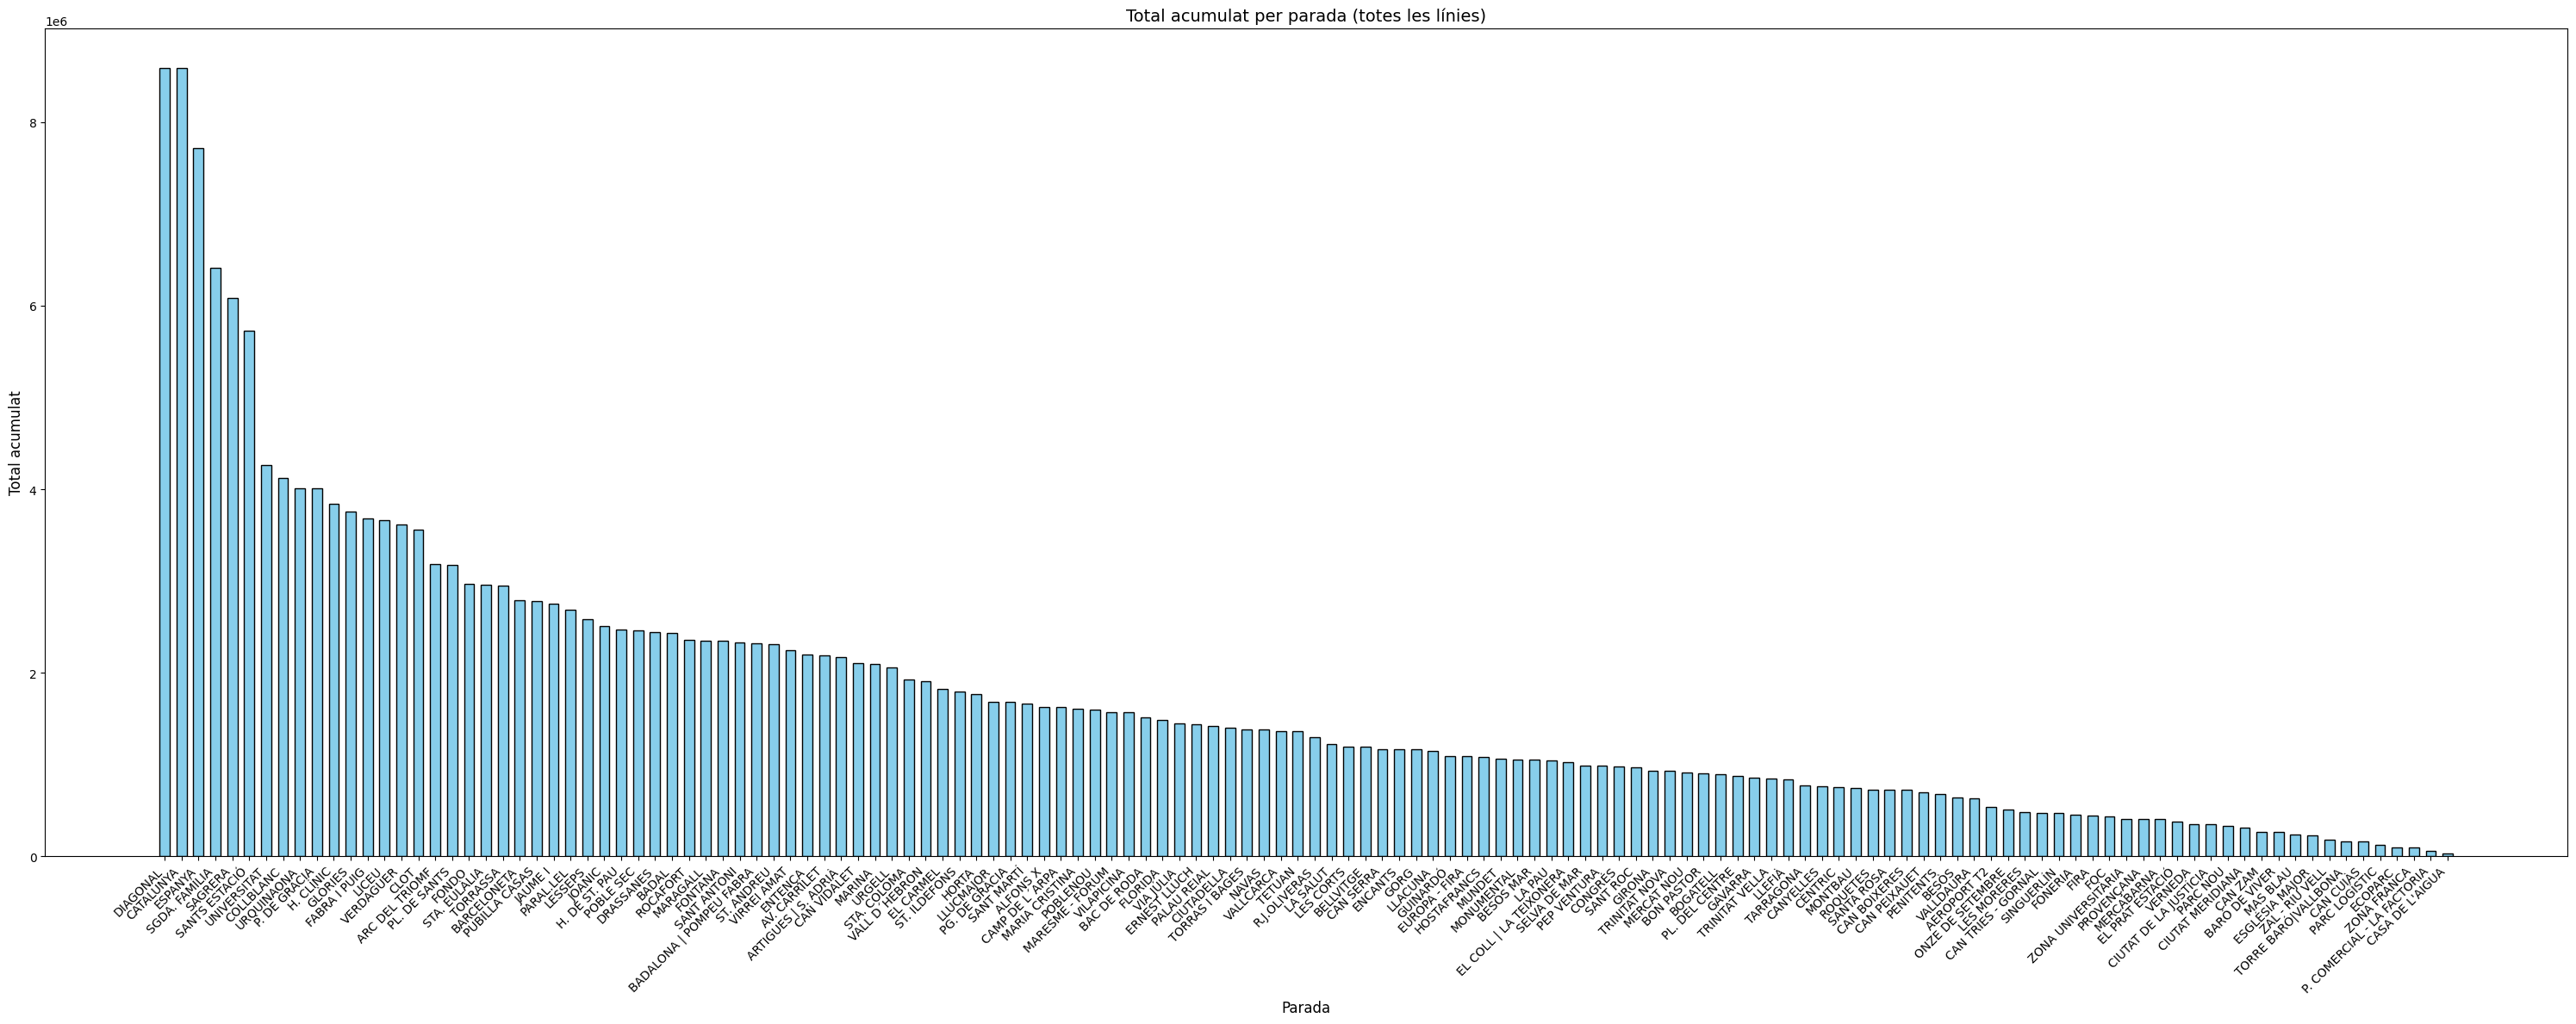

'\nparadas = {}\n\nfor linia in linies:\n    for i in linia["Parada"].iloc[1:-1]:\n        if (i not in paradas):\n            paradas[i] = 0\nfor linia in linies:\n    for i in linia["Parada"].iloc[1:-1]:\n        paradas[i] += linia["ACUMULAT"]\n\nprint(paradas)\n\n\n'

In [47]:
paradas = {}

for linia in linies:
    # recorremos las filas del DataFrame excepto la primera y la última
    for _, fila in linia.iloc[1:-1].iterrows():
        parada = fila["Parada"]
        acumulat = fila["ACUMULAT"]

        if parada not in paradas:
            paradas[parada] = 0

        paradas[parada] += acumulat

print(paradas)

df_paradas = pd.DataFrame(paradas.items(), columns=["Parada", "Total"])
df_paradas = df_paradas.sort_values("Total", ascending=False)

plt.figure(figsize=(30,12))  # más ancho para más espacio visual
plt.bar(df_paradas["Parada"], df_paradas["Total"], color="skyblue", edgecolor="black", width=0.6)  # <-- más espacio entre barras

plt.title("Total acumulat per parada (totes les línies)", fontsize=14)
plt.xlabel("Parada", fontsize=12)
plt.ylabel("Total acumulat", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
"""
paradas = {}

for linia in linies:
    for i in linia["Parada"].iloc[1:-1]:
        if (i not in paradas):
            paradas[i] = 0
for linia in linies:
    for i in linia["Parada"].iloc[1:-1]:
        paradas[i] += linia["ACUMULAT"]

print(paradas)


"""